# Freelance Platform Projects Regression models

![FREELANCEP](FREELANCEP.png)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from IPython.display import display, Image
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df=pd.read_csv(r"C:\Users\91766\Desktop\PROJECT DATASET\Freelance Platform Projects.csv")

### Finding the rows and No. of columns from dataset

In [3]:
df.shape

(12222, 17)

### Finding the Top 5 rows of dataset

In [4]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Banner images for web desgin websites,Design,Entry ($),Graphic Design,EUR,60.0,remote,ALL,fixed_price,2023-04-29 18:06:39,We are looking to improve the banner images on...,NaN,2010-11-03,Dublin,Ireland,EUR,PPC Management
1,Make my picture a solid silhouette,"Video, Photo & Image",Entry ($),Image Editing,GBP,20.0,remote,ALL,fixed_price,2023-04-29 17:40:28,Hello \n\nI need a quick designer to make 4 pi...,NaN,2017-02-21,London,United Kingdom,GBP,Office manager
2,Bookkeeper needed,Business,Entry ($),Finance & Accounting,GBP,12.0,remote,ALL,fixed_price,2023-04-29 17:40:06,Hi - I need a bookkeeper to assist with bookke...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
3,Accountant needed,Business,Entry ($),Tax Consulting & Advising,GBP,14.0,remote,ALL,fixed_price,2023-04-29 17:32:01,Hi - I need an accountant to assist me with un...,NaN,2023-04-09,London,United Kingdom,GBP,Paralegal
4,Guest Post on High DA Website,Digital Marketing,Expert ($$$),SEO,USD,10000.0,remote,ALL,fixed_price,2023-04-29 17:09:36,"Hi, I am currently running a project where I w...",NaN,2016-07-01,Mumbai,India,USD,Guest posts buyer


## Finding Missing values

In [5]:
df.isnull().sum()

Title                            0
Category Name                    0
Experience                       0
Sub Category Name                0
Currency                         0
Budget                           0
Location                         0
Freelancer Preferred From        0
Type                             0
Date Posted                      0
Description                      0
Duration                     10620
Client Registration Date         0
Client City                      0
Client Country                   0
Client Currency                  0
Client Job Title              7634
dtype: int64

### Visualizing Missing Values

<Axes: >

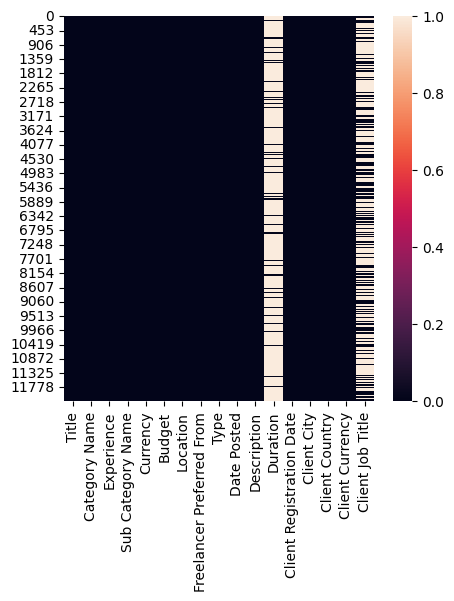

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

- Missing Values in percentage

In [7]:
df.shape[0]

12222

In [8]:
null_val_per=df.isnull().sum()/df.shape[0]*100
null_val_per

Title                         0.000000
Category Name                 0.000000
Experience                    0.000000
Sub Category Name             0.000000
Currency                      0.000000
Budget                        0.000000
Location                      0.000000
Freelancer Preferred From     0.000000
Type                          0.000000
Date Posted                   0.000000
Description                   0.000000
Duration                     86.892489
Client Registration Date      0.000000
Client City                   0.000000
Client Country                0.000000
Client Currency               0.000000
Client Job Title             62.461136
dtype: float64

### dropping column where missing value >50%

In [9]:
drop_column=null_val_per[null_val_per>50].keys()
drop_column

Index(['Duration', 'Client Job Title'], dtype='object')

In [10]:
df=df.drop(columns=drop_column)

In [11]:
df.isnull().sum()

Title                        0
Category Name                0
Experience                   0
Sub Category Name            0
Currency                     0
Budget                       0
Location                     0
Freelancer Preferred From    0
Type                         0
Date Posted                  0
Description                  0
Client Registration Date     0
Client City                  0
Client Country               0
Client Currency              0
dtype: int64

In [12]:
df.isnull().sum().sum()

0

<Axes: >

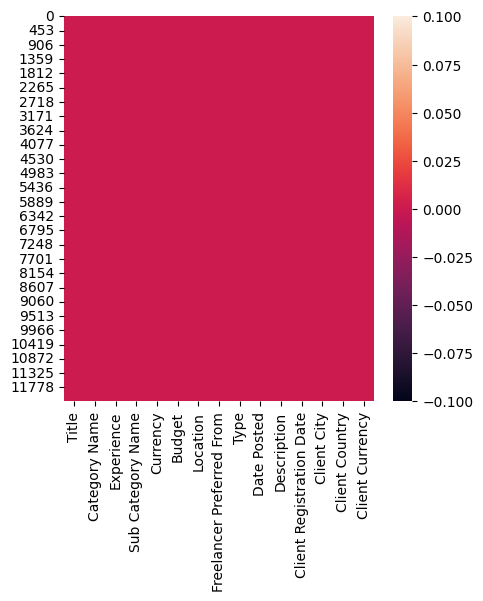

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

Now No missing Value in the dataset

### Finding datatype of dataset

In [14]:
df.dtypes

Title                         object
Category Name                 object
Experience                    object
Sub Category Name             object
Currency                      object
Budget                       float64
Location                      object
Freelancer Preferred From     object
Type                          object
Date Posted                   object
Description                   object
Client Registration Date      object
Client City                   object
Client Country                object
Client Currency               object
dtype: object

### Converting Categorical datatypes into Numerical datatypes Using Label Encoding

In [15]:
columns_to_encode = ['Title','Category Name','Sub Category Name','Freelancer Preferred From','Description',
                     'Client City','Client Country']

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [17]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                    object
Sub Category Name              int32
Currency                      object
Budget                       float64
Location                      object
Freelancer Preferred From      int32
Type                          object
Date Posted                   object
Description                    int32
Client Registration Date      object
Client City                    int32
Client Country                 int32
Client Currency               object
dtype: object

### Now converting column Object datatypes Using One hot encoding

In [18]:
col_to_encode=['Location','Type']

In [19]:
df = pd.get_dummies(df, columns=col_to_encode)

In [20]:
df.shape

(12222, 18)

In [21]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                    object
Sub Category Name              int32
Currency                      object
Budget                       float64
Freelancer Preferred From      int32
Date Posted                   object
Description                    int32
Client Registration Date      object
Client City                    int32
Client Country                 int32
Client Currency               object
Location_onsite                uint8
Location_remote                uint8
Location_remote_country        uint8
Type_fixed_price               uint8
Type_hourly                    uint8
dtype: object

In [22]:
df[['Location_onsite','Location_remote','Type_fixed_price','Type_hourly']]=df[['Location_onsite',
                                                                               'Location_remote',
                                                                               'Type_fixed_price',
                                                                               'Type_hourly']].astype('int32')

In [23]:
df[['Location_remote_country']]=df[['Location_remote_country']].astype('int32')

In [24]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                    object
Sub Category Name              int32
Currency                      object
Budget                       float64
Freelancer Preferred From      int32
Date Posted                   object
Description                    int32
Client Registration Date      object
Client City                    int32
Client Country                 int32
Client Currency               object
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Type_fixed_price               int32
Type_hourly                    int32
dtype: object

### Manually Replacing Label of Experience with 0,1,2 

In [25]:
df['Experience'] = df['Experience'].replace({'Entry ($)':0, 'Intermediate ($$)': 1,'Expert ($$$)': 2})

In [26]:
df['Experience'].dtypes

dtype('int64')

### Featuring columns of dataset

### Replacing Budget values in US Dollar

- Define a function to calculate the adjusted budget

In [27]:
def Budget_USD(row):
    if row['Currency'] == 'EUR':
        return row['Budget'] * 1.0956
    elif row['Currency'] == 'GBP':
        return row['Budget'] * 1.28
    else:
        return row['Budget']

- Apply the function to create a new column 'Budget_USD'

In [28]:
df['Budget'] = df.apply(Budget_USD, axis=1)

- Print the updated dataframe

In [29]:
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency,Location_onsite,Location_remote,Location_remote_country,Type_fixed_price,Type_hourly
0,969,1,0,42,EUR,65.736,1,2023-04-29 18:06:39,10434,2010-11-03,489,61,EUR,0,1,0,1,0
1,6377,7,0,45,GBP,25.600,1,2023-04-29 17:40:28,1247,2017-02-21,940,129,GBP,0,1,0,1,0
2,1108,0,0,37,GBP,15.360,1,2023-04-29 17:40:06,2179,2023-04-09,940,129,GBP,0,1,0,1,0
3,467,0,0,90,GBP,17.920,1,2023-04-29 17:32:01,2181,2023-04-09,940,129,GBP,0,1,0,1,0
4,3859,2,2,76,USD,10000.000,1,2023-04-29 17:09:36,3024,2016-07-01,1079,58,USD,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7958,8,0,21,GBP,64.000,1,2023-01-18 19:23:01,3660,2011-06-06,47,88,GBP,0,1,0,1,0
12218,8803,1,1,101,GBP,83.200,16,2023-01-18 19:18:48,8718,2022-03-23,554,129,GBP,0,0,1,1,0
12219,8927,6,0,25,GBP,64.000,1,2023-01-18 19:18:48,6547,2022-03-14,940,129,GBP,0,1,0,1,0
12220,2057,1,2,101,USD,39.000,1,2023-01-18 19:18:47,4154,2013-07-21,1135,58,USD,0,1,0,0,1


### Replacing Currency Unit into USD

In [30]:
df['Currency'] = df['Currency'].replace({'EUR':'USD', 'GBP': 'USD',' USD':'USD'})

In [31]:
df['Currency'] = df['Currency'].replace({'USD':1})

In [32]:
df['Currency'].nunique()

1

In [33]:
df['Currency'].dtypes

dtype('int64')

### Now converting client currency with their currency values:

In [34]:
df['Client Currency'].unique()

array(['EUR', 'GBP', 'USD'], dtype=object)

In [35]:
df['Client Currency'] = df['Client Currency'].replace({'EUR':1.09565, 'GBP': 1.2824,'USD': 1})

In [36]:
df['Client Currency'].dtypes

dtype('float64')

In [37]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Date Posted                   object
Description                    int32
Client Registration Date      object
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Type_fixed_price               int32
Type_hourly                    int32
dtype: object

### Splitting 'Dated posted' into Year,Month,Date and Time

In [38]:
df['Date Posted']

0        2023-04-29 18:06:39
1        2023-04-29 17:40:28
2        2023-04-29 17:40:06
3        2023-04-29 17:32:01
4        2023-04-29 17:09:36
                ...         
12217    2023-01-18 19:23:01
12218    2023-01-18 19:18:48
12219    2023-01-18 19:18:48
12220    2023-01-18 19:18:47
12221    2023-01-18 19:18:47
Name: Date Posted, Length: 12222, dtype: object

In [39]:
df[['Posted_day', 'Posted_time']] = df['Date Posted'].str.split(' ', 1, expand=True)

In [40]:
df[['Posted_day', 'Posted_time']]

,Posted_day,Posted_time
0,2023-04-29,18:06:39
1,2023-04-29,17:40:28
2,2023-04-29,17:40:06
3,2023-04-29,17:32:01
4,2023-04-29,17:09:36
...,...,...
12217,2023-01-18,19:23:01
12218,2023-01-18,19:18:48
12219,2023-01-18,19:18:48
12220,2023-01-18,19:18:47


In [41]:
df[['posted_year','Posted_Month','Posted_Date']]=df['Posted_day'].str.split('-', 3, expand=True)

In [42]:
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Date Posted,Description,Client Registration Date,...,Location_onsite,Location_remote,Location_remote_country,Type_fixed_price,Type_hourly,Posted_day,Posted_time,posted_year,Posted_Month,Posted_Date
0,969,1,0,42,1,65.736,1,2023-04-29 18:06:39,10434,2010-11-03,...,0,1,0,1,0,2023-04-29,18:06:39,2023,04,29
1,6377,7,0,45,1,25.600,1,2023-04-29 17:40:28,1247,2017-02-21,...,0,1,0,1,0,2023-04-29,17:40:28,2023,04,29
2,1108,0,0,37,1,15.360,1,2023-04-29 17:40:06,2179,2023-04-09,...,0,1,0,1,0,2023-04-29,17:40:06,2023,04,29
3,467,0,0,90,1,17.920,1,2023-04-29 17:32:01,2181,2023-04-09,...,0,1,0,1,0,2023-04-29,17:32:01,2023,04,29
4,3859,2,2,76,1,10000.000,1,2023-04-29 17:09:36,3024,2016-07-01,...,0,1,0,1,0,2023-04-29,17:09:36,2023,04,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7958,8,0,21,1,64.000,1,2023-01-18 19:23:01,3660,2011-06-06,...,0,1,0,1,0,2023-01-18,19:23:01,2023,01,18
12218,8803,1,1,101,1,83.200,16,2023-01-18 19:18:48,8718,2022-03-23,...,0,0,1,1,0,2023-01-18,19:18:48,2023,01,18
12219,8927,6,0,25,1,64.000,1,2023-01-18 19:18:48,6547,2022-03-14,...,0,1,0,1,0,2023-01-18,19:18:48,2023,01,18
12220,2057,1,2,101,1,39.000,1,2023-01-18 19:18:47,4154,2013-07-21,...,0,1,0,0,1,2023-01-18,19:18:47,2023,01,18


In [43]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Date Posted                   object
Description                    int32
Client Registration Date      object
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Type_fixed_price               int32
Type_hourly                    int32
Posted_day                    object
Posted_time                   object
posted_year                   object
Posted_Month                  object
Posted_Date                   object
dtype: object

In [44]:
df[['posted_year','Posted_Month','Posted_Date']]=df[['posted_year','Posted_Month',
                                                     'Posted_Date']].astype('int32')

In [45]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Date Posted                   object
Description                    int32
Client Registration Date      object
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Type_fixed_price               int32
Type_hourly                    int32
Posted_day                    object
Posted_time                   object
posted_year                    int32
Posted_Month                   int32
Posted_Date                    int32
dtype: object

### Dropping Budget and Date Posted Column

In [46]:
df=df.drop(columns=['Date Posted'])

In [47]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Description                    int32
Client Registration Date      object
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Type_fixed_price               int32
Type_hourly                    int32
Posted_day                    object
Posted_time                   object
posted_year                    int32
Posted_Month                   int32
Posted_Date                    int32
dtype: object

In [48]:
df.shape

(12222, 22)

### Splitting 'Client Registration Date' into Year,Month,date and Time

In [49]:
df['Client Registration Date']

0        2010-11-03
1        2017-02-21
2        2023-04-09
3        2023-04-09
4        2016-07-01
            ...    
12217    2011-06-06
12218    2022-03-23
12219    2022-03-14
12220    2013-07-21
12221    2020-09-21
Name: Client Registration Date, Length: 12222, dtype: object

In [50]:
df[['client_year','client_Month','client_Date']]=df['Client Registration Date'].str.split('-', 3, expand=True)

In [51]:
df[['client_year','client_Month','client_Date']]=df[['client_year','client_Month','client_Date']].astype('int32')

In [52]:
df=df.drop(columns=['Client Registration Date'])

In [53]:
df

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Description,Client City,Client Country,...,Type_fixed_price,Type_hourly,Posted_day,Posted_time,posted_year,Posted_Month,Posted_Date,client_year,client_Month,client_Date
0,969,1,0,42,1,65.736,1,10434,489,61,...,1,0,2023-04-29,18:06:39,2023,4,29,2010,11,3
1,6377,7,0,45,1,25.600,1,1247,940,129,...,1,0,2023-04-29,17:40:28,2023,4,29,2017,2,21
2,1108,0,0,37,1,15.360,1,2179,940,129,...,1,0,2023-04-29,17:40:06,2023,4,29,2023,4,9
3,467,0,0,90,1,17.920,1,2181,940,129,...,1,0,2023-04-29,17:32:01,2023,4,29,2023,4,9
4,3859,2,2,76,1,10000.000,1,3024,1079,58,...,1,0,2023-04-29,17:09:36,2023,4,29,2016,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7958,8,0,21,1,64.000,1,3660,47,88,...,1,0,2023-01-18,19:23:01,2023,1,18,2011,6,6
12218,8803,1,1,101,1,83.200,16,8718,554,129,...,1,0,2023-01-18,19:18:48,2023,1,18,2022,3,23
12219,8927,6,0,25,1,64.000,1,6547,940,129,...,1,0,2023-01-18,19:18:48,2023,1,18,2022,3,14
12220,2057,1,2,101,1,39.000,1,4154,1135,58,...,0,1,2023-01-18,19:18:47,2023,1,18,2013,7,21


In [54]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Description                    int32
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Type_fixed_price               int32
Type_hourly                    int32
Posted_day                    object
Posted_time                   object
posted_year                    int32
Posted_Month                   int32
Posted_Date                    int32
client_year                    int32
client_Month                   int32
client_Date                    int32
dtype: object

### Now splitting 'Posted Time' Column into Hour,Minute and Second

In [55]:
df['Posted_time']

0        18:06:39
1        17:40:28
2        17:40:06
3        17:32:01
4        17:09:36
           ...   
12217    19:23:01
12218    19:18:48
12219    19:18:48
12220    19:18:47
12221    19:18:47
Name: Posted_time, Length: 12222, dtype: object

In [56]:
df[['Posted_Hour','Posted_Min','Posted_Sec']]=df['Posted_time'].str.split(':',3, expand=True)

In [57]:
df[['Posted_Hour','Posted_Min','Posted_Sec']]=df[['Posted_Hour','Posted_Min','Posted_Sec']].astype('int32')

- Dropping 'Posted_time' Column

In [58]:
df=df.drop(columns='Posted_time')

In [59]:
df.dtypes

Title                          int32
Category Name                  int32
Experience                     int64
Sub Category Name              int32
Currency                       int64
Budget                       float64
Freelancer Preferred From      int32
Description                    int32
Client City                    int32
Client Country                 int32
Client Currency              float64
Location_onsite                int32
Location_remote                int32
Location_remote_country        int32
Type_fixed_price               int32
Type_hourly                    int32
Posted_day                    object
posted_year                    int32
Posted_Month                   int32
Posted_Date                    int32
client_year                    int32
client_Month                   int32
client_Date                    int32
Posted_Hour                    int32
Posted_Min                     int32
Posted_Sec                     int32
dtype: object

In [60]:
df.shape

(12222, 26)

In [61]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Description,Client City,Client Country,...,Posted_day,posted_year,Posted_Month,Posted_Date,client_year,client_Month,client_Date,Posted_Hour,Posted_Min,Posted_Sec
0,969,1,0,42,1,65.736,1,10434,489,61,...,2023-04-29,2023,4,29,2010,11,3,18,6,39
1,6377,7,0,45,1,25.600,1,1247,940,129,...,2023-04-29,2023,4,29,2017,2,21,17,40,28
2,1108,0,0,37,1,15.360,1,2179,940,129,...,2023-04-29,2023,4,29,2023,4,9,17,40,6
3,467,0,0,90,1,17.920,1,2181,940,129,...,2023-04-29,2023,4,29,2023,4,9,17,32,1
4,3859,2,2,76,1,10000.000,1,3024,1079,58,...,2023-04-29,2023,4,29,2016,7,1,17,9,36


### Dropping Unnecessary 'Posted_day' Column

In [62]:
df=df.drop(columns='Posted_day')

In [63]:
df.describe()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Description,Client City,Client Country,...,Type_hourly,posted_year,Posted_Month,Posted_Date,client_year,client_Month,client_Date,Posted_Hour,Posted_Min,Posted_Sec
count,12222.000000,12222.000000,12222.000000,12222.000000,12222.0,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,...,12222.000000,12222.0,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000,12222.000000
mean,5806.995173,3.712813,1.007282,56.839552,1.0,272.077271,2.186876,5958.065538,871.258714,113.476681,...,0.146048,2023.0,2.696367,16.161676,2018.803796,5.402144,15.564638,11.636639,29.628702,29.392653
std,3340.786412,2.820344,0.936768,32.627551,0.0,2345.979319,5.015981,3446.774106,456.183611,32.275724,...,0.353169,0.0,1.003399,8.698321,4.002551,3.466704,8.658182,5.211910,18.065553,17.294521
min,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2023.0,1.000000,1.000000,2007.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2918.250000,1.000000,0.000000,30.000000,1.0,38.400000,1.000000,2965.250000,487.250000,128.000000,...,0.000000,2023.0,2.000000,9.000000,2016.000000,2.000000,8.000000,9.000000,13.000000,14.000000
50%,5842.500000,3.000000,1.000000,52.000000,1.0,96.000000,1.000000,5960.500000,940.000000,129.000000,...,0.000000,2023.0,3.000000,17.000000,2020.000000,4.000000,16.000000,12.000000,30.000000,29.000000
75%,8707.750000,6.000000,2.000000,92.000000,1.0,192.000000,1.000000,8938.750000,1139.000000,129.000000,...,0.000000,2023.0,4.000000,24.000000,2023.000000,9.000000,23.000000,16.000000,46.000000,44.000000
max,11584.000000,8.000000,2.000000,106.000000,1.0,127998.720000,41.000000,11924.000000,1807.000000,135.000000,...,1.000000,2023.0,4.000000,31.000000,2023.000000,12.000000,31.000000,23.000000,59.000000,59.000000


## Removing Outliers

In [64]:
import seaborn as sns

In [65]:
df.columns

Index(['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Freelancer Preferred From', 'Description', 'Client City',
       'Client Country', 'Client Currency', 'Location_onsite',
       'Location_remote', 'Location_remote_country', 'Type_fixed_price',
       'Type_hourly', 'posted_year', 'Posted_Month', 'Posted_Date',
       'client_year', 'client_Month', 'client_Date', 'Posted_Hour',
       'Posted_Min', 'Posted_Sec'],
      dtype='object')

In [66]:
col_num=df[['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Freelancer Preferred From', 'Description', 'Client City',
       'Client Country', 'Client Currency', 'Location_onsite',
       'Location_remote', 'Location_remote_country', 'Type_fixed_price',
       'Type_hourly', 'posted_year', 'Posted_Month', 'Posted_Date',
       'client_year', 'client_Month', 'client_Date', 'Posted_Hour',
       'Posted_Min', 'Posted_Sec']]
col_num

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Description,Client City,Client Country,...,Type_hourly,posted_year,Posted_Month,Posted_Date,client_year,client_Month,client_Date,Posted_Hour,Posted_Min,Posted_Sec
0,969,1,0,42,1,65.736,1,10434,489,61,...,0,2023,4,29,2010,11,3,18,6,39
1,6377,7,0,45,1,25.600,1,1247,940,129,...,0,2023,4,29,2017,2,21,17,40,28
2,1108,0,0,37,1,15.360,1,2179,940,129,...,0,2023,4,29,2023,4,9,17,40,6
3,467,0,0,90,1,17.920,1,2181,940,129,...,0,2023,4,29,2023,4,9,17,32,1
4,3859,2,2,76,1,10000.000,1,3024,1079,58,...,0,2023,4,29,2016,7,1,17,9,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,7958,8,0,21,1,64.000,1,3660,47,88,...,0,2023,1,18,2011,6,6,19,23,1
12218,8803,1,1,101,1,83.200,16,8718,554,129,...,0,2023,1,18,2022,3,23,19,18,48
12219,8927,6,0,25,1,64.000,1,6547,940,129,...,0,2023,1,18,2022,3,14,19,18,48
12220,2057,1,2,101,1,39.000,1,4154,1135,58,...,1,2023,1,18,2013,7,21,19,18,47


In [67]:
from scipy.stats import skew

Axes(0.125,0.747241;0.133621x0.132759)
Axes(0.285345,0.747241;0.133621x0.132759)
Axes(0.44569,0.747241;0.133621x0.132759)
Axes(0.606034,0.747241;0.133621x0.132759)
Axes(0.766379,0.747241;0.133621x0.132759)
Axes(0.125,0.587931;0.133621x0.132759)
Axes(0.285345,0.587931;0.133621x0.132759)
Axes(0.44569,0.587931;0.133621x0.132759)
Axes(0.606034,0.587931;0.133621x0.132759)
Axes(0.766379,0.587931;0.133621x0.132759)
Axes(0.125,0.428621;0.133621x0.132759)
Axes(0.285345,0.428621;0.133621x0.132759)
Axes(0.44569,0.428621;0.133621x0.132759)
Axes(0.606034,0.428621;0.133621x0.132759)
Axes(0.766379,0.428621;0.133621x0.132759)
Axes(0.125,0.26931;0.133621x0.132759)
Axes(0.285345,0.26931;0.133621x0.132759)
Axes(0.44569,0.26931;0.133621x0.132759)
Axes(0.606034,0.26931;0.133621x0.132759)
Axes(0.766379,0.26931;0.133621x0.132759)
Axes(0.125,0.11;0.133621x0.132759)
Axes(0.285345,0.11;0.133621x0.132759)
Axes(0.44569,0.11;0.133621x0.132759)
Axes(0.606034,0.11;0.133621x0.132759)
Axes(0.766379,0.11;0.133621x0.132

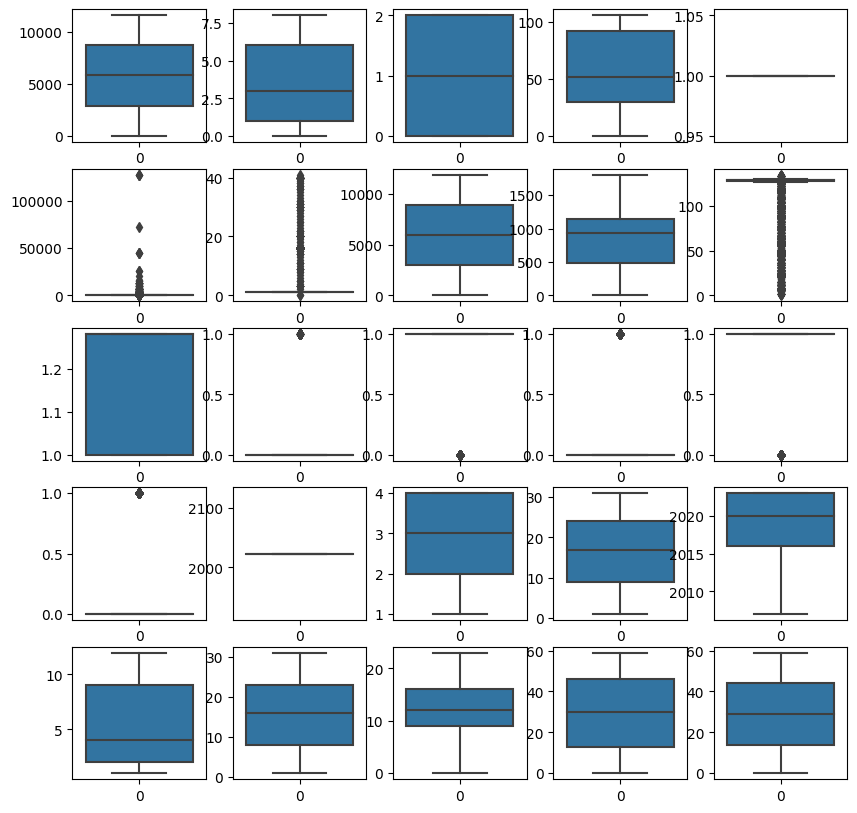

<Figure size 640x480 with 0 Axes>

In [68]:
plt.figure(figsize=(10,10))
for i,col in enumerate(col_num):
    plt.subplot(5,5,i+1)
    print(sns.boxplot(col_num[col]))
plt.figure()
plt.show()

### Finding outliers in 'Freelance preferred From'

<Axes: >

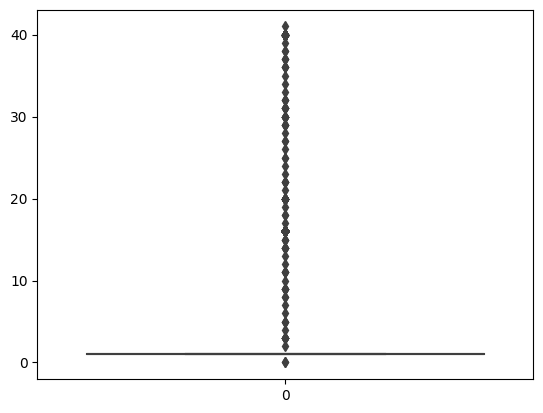

In [69]:
import seaborn as sns

sns.boxplot(df['Freelancer Preferred From'])

In [70]:
df['Freelancer Preferred From'].value_counts()

1     11431
16      578
40       90
20       27
3        10
30        9
31        6
14        6
9         6
36        4
11        4
29        4
22        4
5         3
32        3
37        3
15        3
27        2
38        2
25        2
8         2
0         2
18        2
6         1
41        1
13        1
10        1
19        1
35        1
7         1
17        1
2         1
39        1
23        1
34        1
24        1
33        1
4         1
12        1
21        1
26        1
28        1
Name: Freelancer Preferred From, dtype: int64

### finding outliers using IQR Method
1. sort the data
2. calculate Q1(25%) and Q3(75%)
3. IQR(Q3-Q1)
4. Find the Lower Fence(Q1-1.5(IQR))
5. Find the Upper Fence(Q3+1.5(IQR))

In [71]:
Freelancer_Preferred_From=sorted(df['Freelancer Preferred From'])
Q1,Q3=np.percentile(Freelancer_Preferred_From,[25,75])
IQR=Q3-Q1
lower_fence=Q1-(1.5*IQR)
upper_fence=Q3+(1.5*IQR)
(lower_fence,upper_fence)

(1.0, 1.0)

In [72]:
df=df[df['Freelancer Preferred From']<=upper_fence]

In [73]:
df=df[df['Freelancer Preferred From']>=lower_fence]

<Axes: >

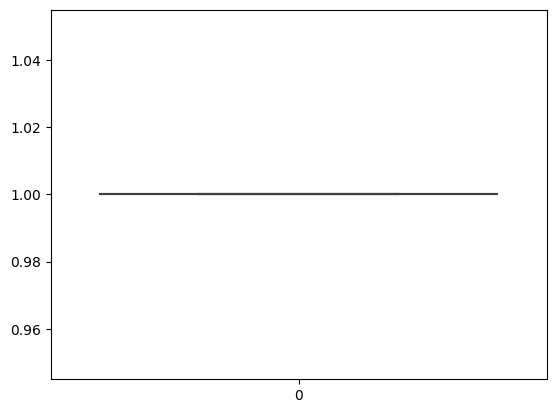

In [74]:
import seaborn as sns

sns.boxplot(df['Freelancer Preferred From'])

### Findind Outliers in 'Client Country'

<Axes: >

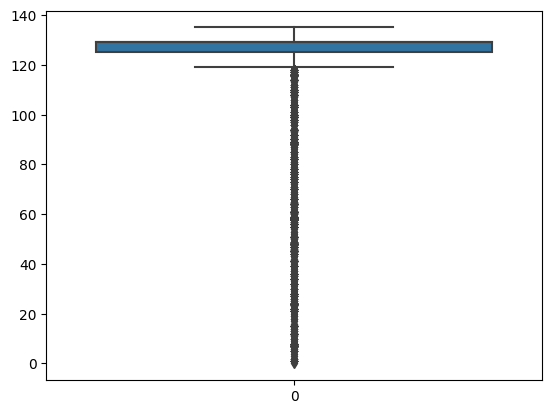

In [75]:
import seaborn as sns

sns.boxplot(df['Client Country'])

In [76]:
df['Client Country'].value_counts()

129    7361
130    1017
58      308
24      157
116     157
       ... 
3         1
40        1
42        1
54        1
62        1
Name: Client Country, Length: 135, dtype: int64

### Finding Outliers of Client Country using IQR method

In [77]:
Client_Country=sorted(df['Client Country'])
Q1,Q3=np.percentile(Client_Country,[25,75])
IQR=Q3-Q1
lower_fence=Q1-(1.5*IQR)
upper_fence=Q3+(1.5*IQR)
print(lower_fence,upper_fence)

119.0 135.0


In [78]:
df=df[df['Client Country']<upper_fence]

In [79]:
# Finding Outliers using IQR method

<Axes: >

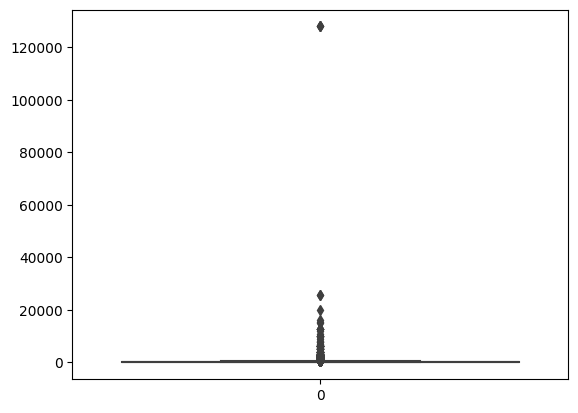

In [80]:
import seaborn as sns

sns.boxplot(df['Budget'])

In [81]:
Budget=sorted(df['Budget'])
Q1,Q3=np.percentile(Budget,[25,75])
IQR=Q3-Q1
lower_fence=Q1-(1.5*IQR)
upper_fence=Q3+(1.5*IQR)
print(lower_fence,upper_fence)

-191.99999999999997 422.4


In [82]:
df=df[df['Budget']<=upper_fence]

<Axes: >

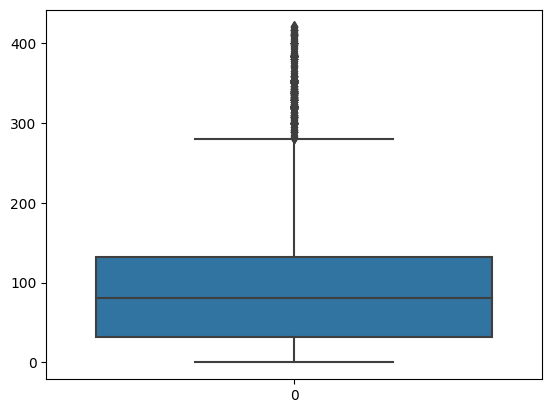

In [83]:
import seaborn as sns

sns.boxplot(df['Budget'])

## Finding Outlier Using Skewness

In [84]:
from scipy.stats import skew

In [85]:
col_num=df[['Title', 'Category Name', 'Experience', 'Sub Category Name', 'Currency',
       'Budget', 'Freelancer Preferred From', 'Description', 'Client City',
       'Client Country', 'Client Currency', 'Location_onsite',
       'Location_remote', 'Location_remote_country', 'Type_fixed_price',
       'Type_hourly', 'posted_year', 'Posted_Month', 'Posted_Date',
       'client_year', 'client_Month', 'client_Date', 'Posted_Hour',
       'Posted_Min', 'Posted_Sec']]
col_num

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Description,Client City,Client Country,...,Type_hourly,posted_year,Posted_Month,Posted_Date,client_year,client_Month,client_Date,Posted_Hour,Posted_Min,Posted_Sec
0,969,1,0,42,1,65.736,1,10434,489,61,...,0,2023,4,29,2010,11,3,18,6,39
1,6377,7,0,45,1,25.600,1,1247,940,129,...,0,2023,4,29,2017,2,21,17,40,28
2,1108,0,0,37,1,15.360,1,2179,940,129,...,0,2023,4,29,2023,4,9,17,40,6
3,467,0,0,90,1,17.920,1,2181,940,129,...,0,2023,4,29,2023,4,9,17,32,1
6,6384,1,0,101,1,10.000,1,6724,940,129,...,0,2023,4,29,2023,4,27,16,51,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12216,8927,6,0,26,1,38.400,1,6546,940,129,...,0,2023,1,18,2022,3,14,19,23,2
12217,7958,8,0,21,1,64.000,1,3660,47,88,...,0,2023,1,18,2011,6,6,19,23,1
12219,8927,6,0,25,1,64.000,1,6547,940,129,...,0,2023,1,18,2022,3,14,19,18,48
12220,2057,1,2,101,1,39.000,1,4154,1135,58,...,1,2023,1,18,2013,7,21,19,18,47


Title
0.002389963996342471
Category Name
0.19490469318582926
Experience
0.21463618168554072
Sub Category Name
-0.0054284645756947384
Currency
nan
Budget
1.3377240368803143
Freelancer Preferred From
nan
Description
0.030265568931130096
Client City
0.03275272988601776
Client Country
-1.9196687121818936
Client Currency
-0.6853232814636304
Location_onsite
nan
Location_remote
nan
Location_remote_country
nan
Type_fixed_price
-1.9655937099000325
Type_hourly
1.9655937099000331
posted_year
nan
Posted_Month
-0.14569222811345361
Posted_Date
-0.10922163961806006
client_year
-0.6399900760432163
client_Month
0.48527078880145114
client_Date
0.027115065606648437
Posted_Hour
-0.3847468388067166
Posted_Min
-0.013527926232512493
Posted_Sec
0.01335450244560453


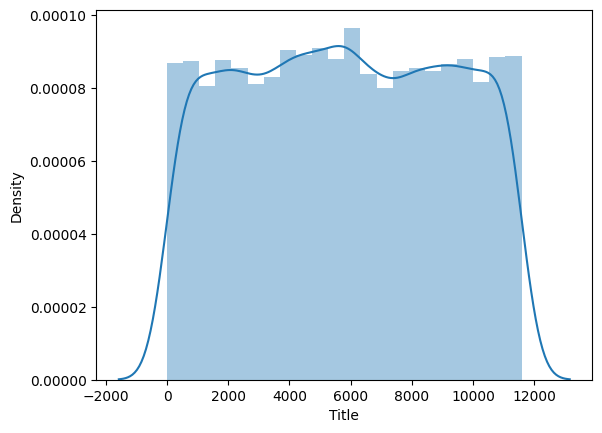

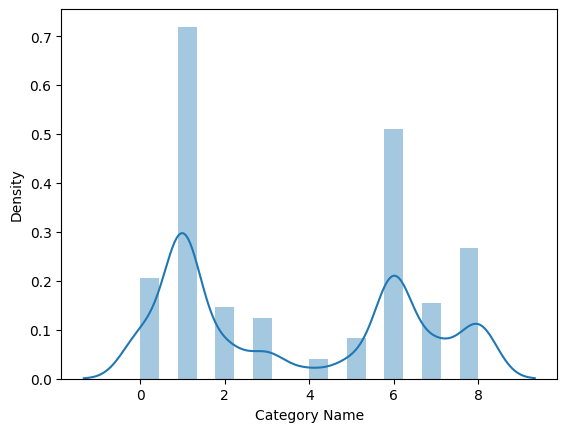

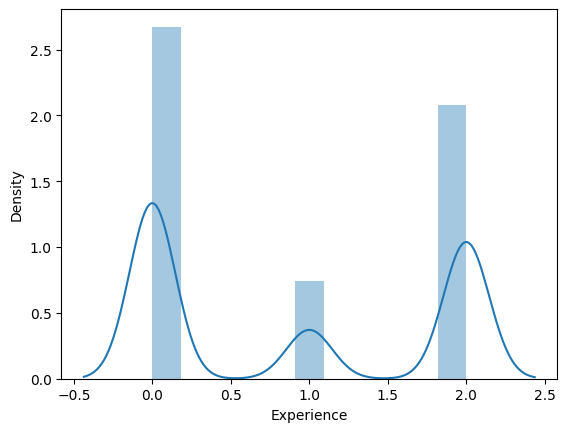

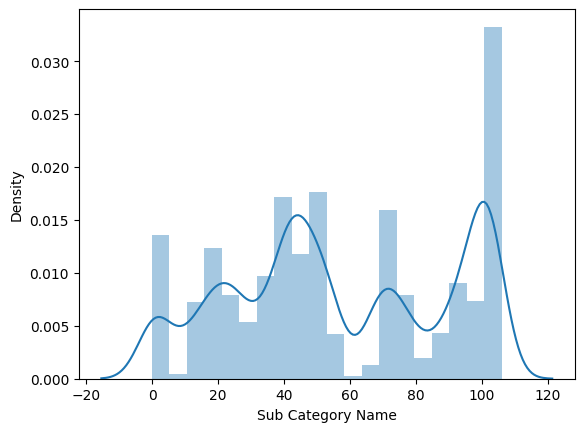

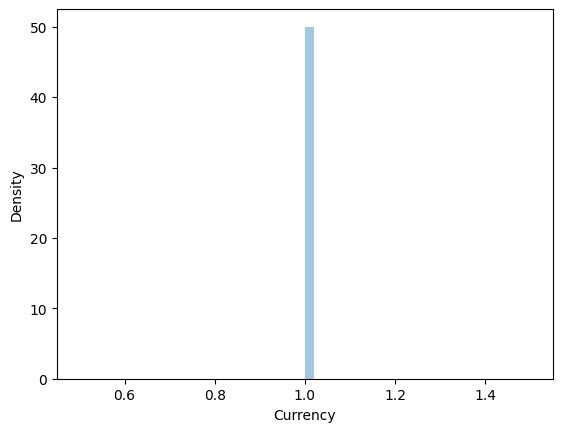

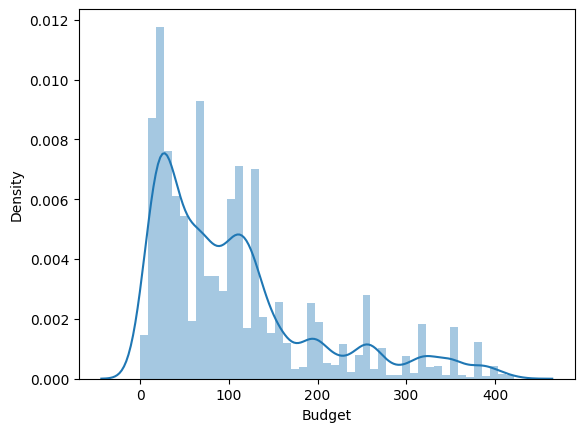

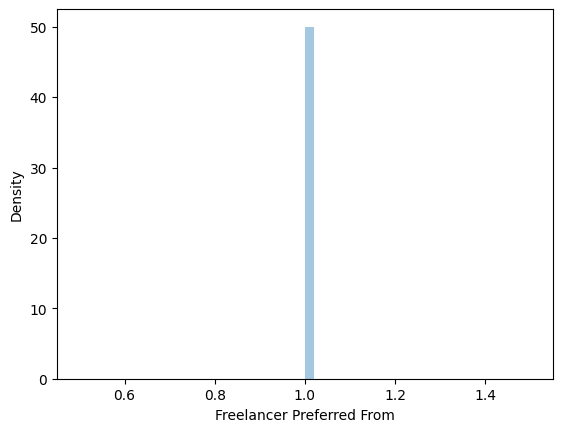

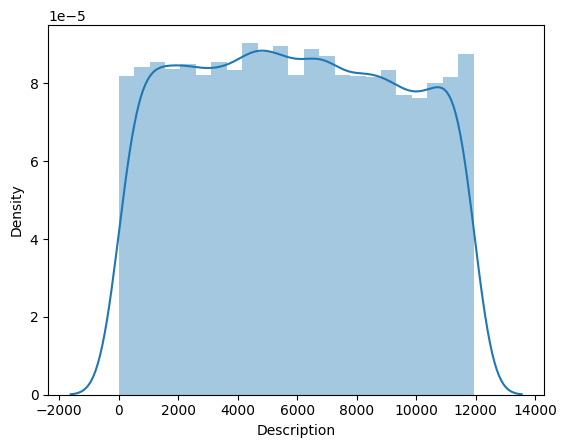

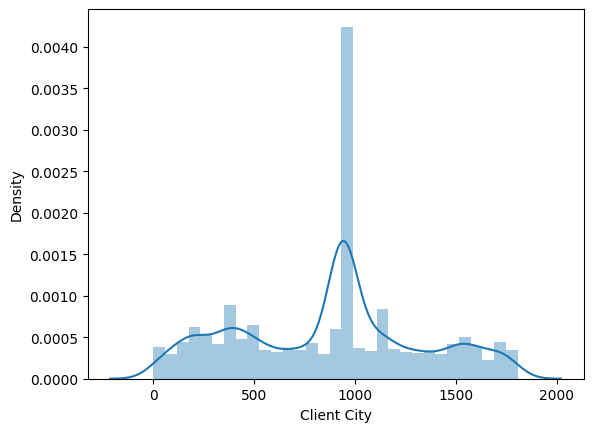

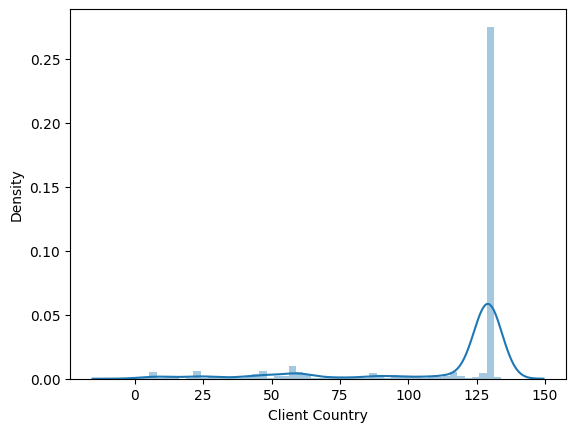

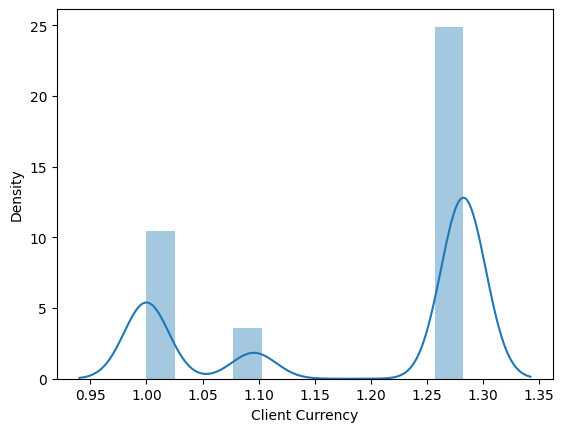

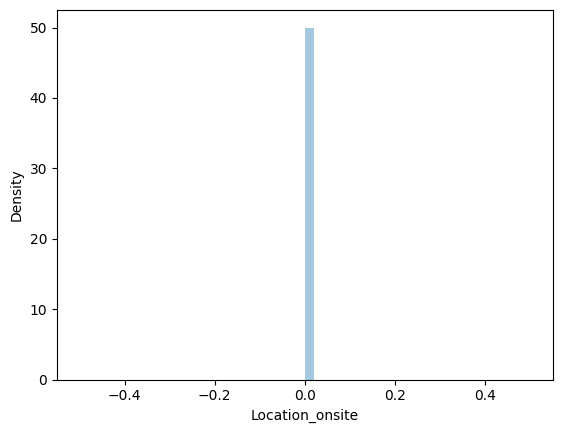

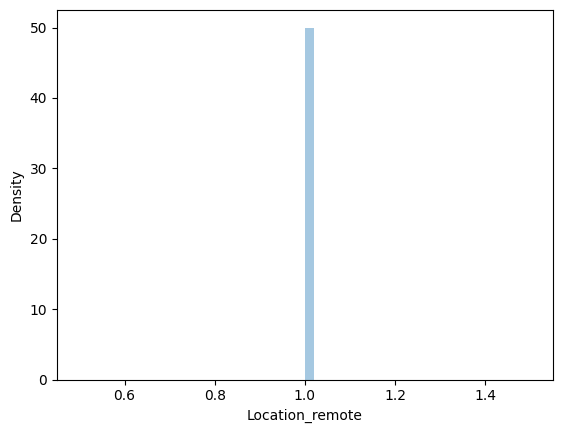

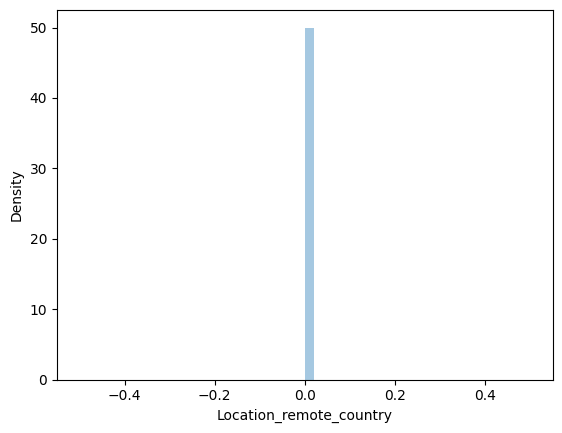

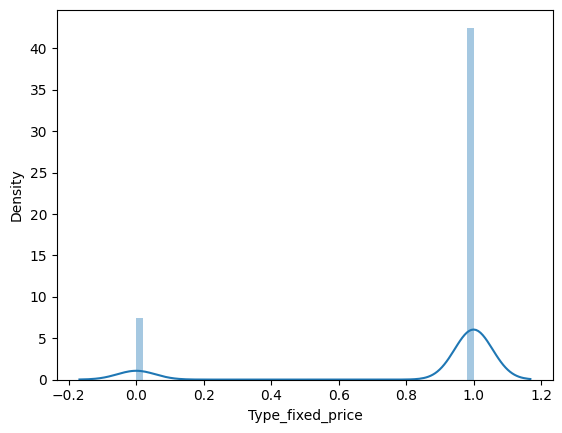

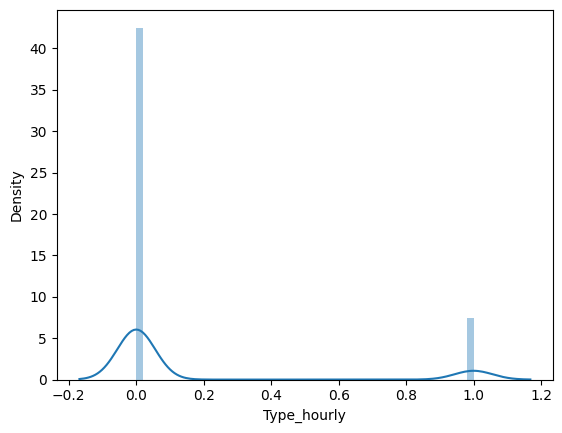

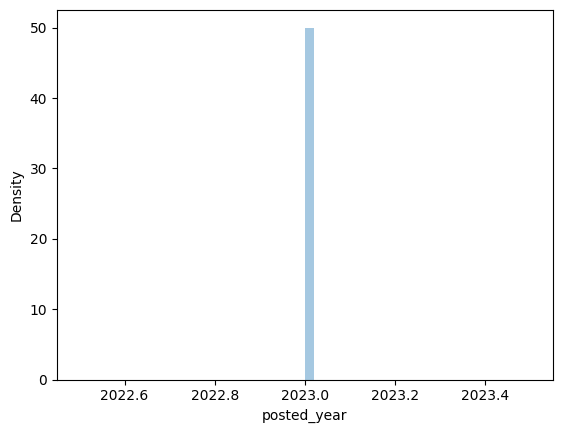

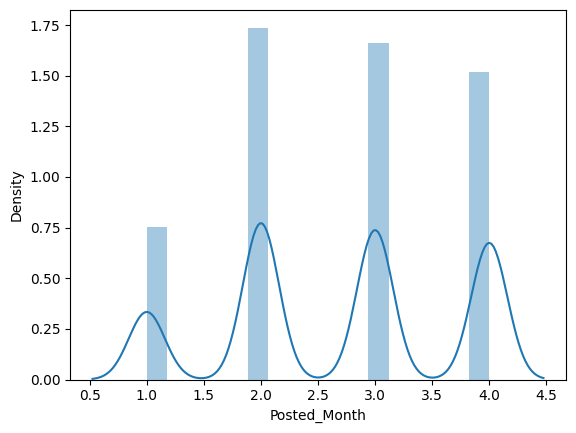

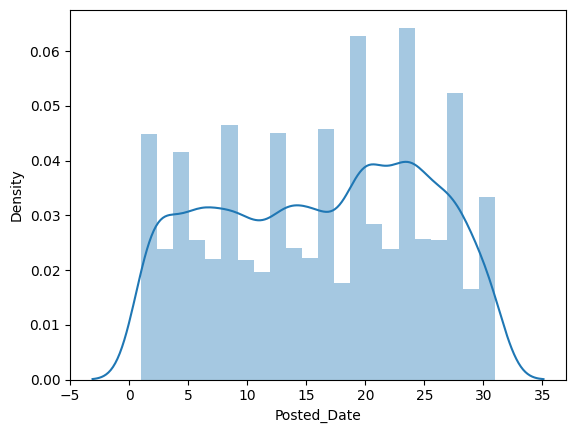

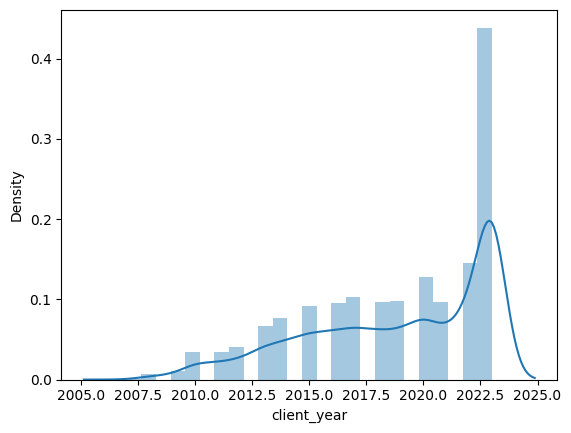

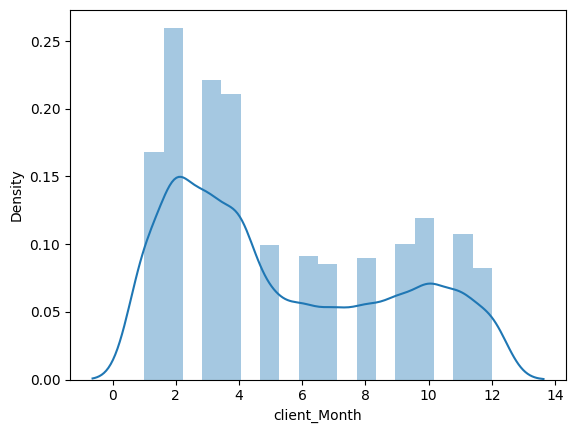

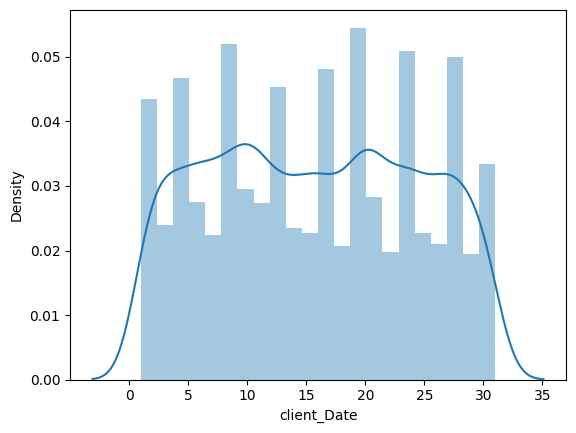

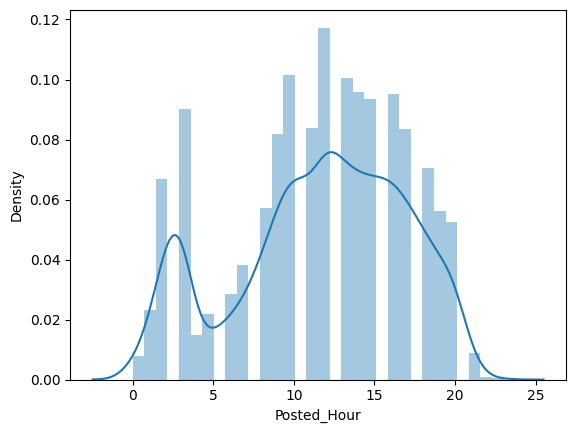

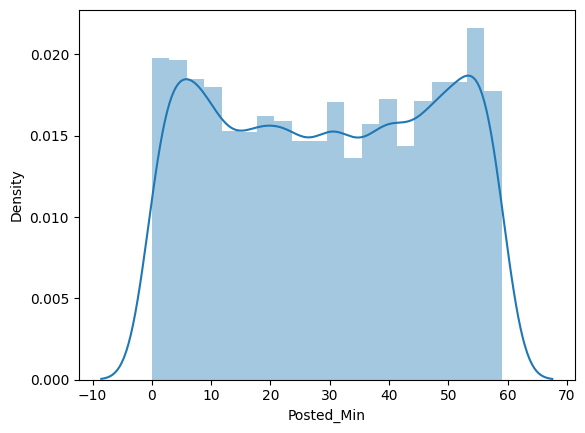

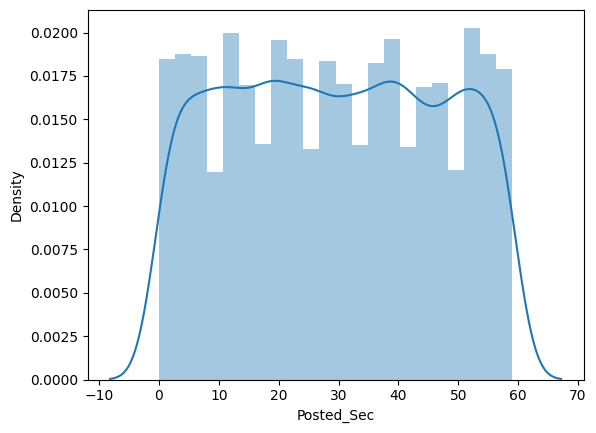

In [86]:
for col in col_num:
    print(col)
    print(skew(col_num[col]))
    
    plt.figure()
    sns.distplot(col_num[col])

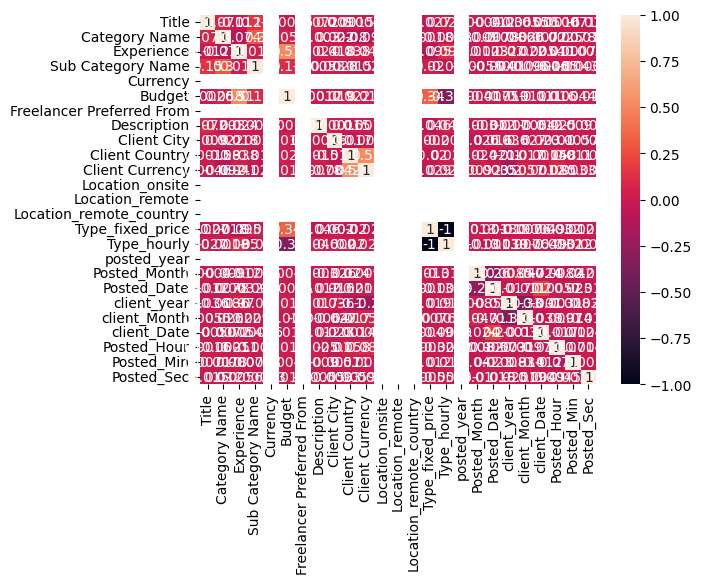

In [87]:
sns.heatmap(col_num.corr(),annot=True)
plt.show()

In [88]:
df.shape

(10366, 25)

In [89]:
df=df[df['Client Country']>90]

In [90]:
df.shape

(8480, 25)

## Now scaling the entire dataset

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
mx=MinMaxScaler()

In [93]:
for col in df:
    mx=MinMaxScaler()
    df[col]=mx.fit_transform(df[[col]])

In [94]:
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Freelancer Preferred From,Description,Client City,Client Country,...,Type_hourly,posted_year,Posted_Month,Posted_Date,client_year,client_Month,client_Date,Posted_Hour,Posted_Min,Posted_Sec
1,0.550501,0.875,0.0,0.424528,0.0,0.060952,0.0,0.104579,0.520776,0.880952,...,0.0,0.0,1.0,0.933333,0.6250,0.090909,0.666667,0.739130,0.677966,0.474576
2,0.095649,0.000,0.0,0.349057,0.0,0.036571,0.0,0.182741,0.520776,0.880952,...,0.0,0.0,1.0,0.933333,1.0000,0.272727,0.266667,0.739130,0.677966,0.101695
3,0.040314,0.000,0.0,0.849057,0.0,0.042667,0.0,0.182908,0.520776,0.880952,...,0.0,0.0,1.0,0.933333,1.0000,0.272727,0.266667,0.739130,0.542373,0.016949
6,0.551105,0.125,0.0,0.952830,0.0,0.023810,0.0,0.563905,0.520776,0.880952,...,0.0,0.0,1.0,0.933333,1.0000,0.272727,0.866667,0.695652,0.864407,0.677966
7,0.748015,0.750,0.0,0.962264,0.0,0.030476,0.0,0.283630,0.520776,0.880952,...,0.0,0.0,1.0,0.933333,0.1875,1.000000,0.633333,0.695652,0.186441,0.033898


In [95]:
df.dtypes

Title                        float64
Category Name                float64
Experience                   float64
Sub Category Name            float64
Currency                     float64
Budget                       float64
Freelancer Preferred From    float64
Description                  float64
Client City                  float64
Client Country               float64
Client Currency              float64
Location_onsite              float64
Location_remote              float64
Location_remote_country      float64
Type_fixed_price             float64
Type_hourly                  float64
posted_year                  float64
Posted_Month                 float64
Posted_Date                  float64
client_year                  float64
client_Month                 float64
client_Date                  float64
Posted_Hour                  float64
Posted_Min                   float64
Posted_Sec                   float64
dtype: object

### After applying all the Regression Algorithm Model XG Boost Model is found to be more Accurate than other Regression Model which are as follows:

# Using XGBoost Regresson model

In [96]:
x=df.drop(columns=['Budget'],axis=1)
y=df['Budget']

In [97]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=4)

In [98]:
xtrain.dtypes

Title                        float64
Category Name                float64
Experience                   float64
Sub Category Name            float64
Currency                     float64
Freelancer Preferred From    float64
Description                  float64
Client City                  float64
Client Country               float64
Client Currency              float64
Location_onsite              float64
Location_remote              float64
Location_remote_country      float64
Type_fixed_price             float64
Type_hourly                  float64
posted_year                  float64
Posted_Month                 float64
Posted_Date                  float64
client_year                  float64
client_Month                 float64
client_Date                  float64
Posted_Hour                  float64
Posted_Min                   float64
Posted_Sec                   float64
dtype: object

In [99]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Define the XGBoost regressor model
xgb_model = xgb.XGBRegressor()

# Train the model
xgb_model.fit(xtrain, ytrain)

# Make predictions on the test set
trainpred = xgb_model.predict(xtrain)
testpred = xgb_model.predict(xtest)


## Model Evaluation

In [100]:
mse_train = mean_squared_error(ytrain, trainpred)
mse_test = mean_squared_error(ytest, testpred)
r2_train = r2_score(ytrain, trainpred)
r2_test = r2_score(ytest, testpred)

print('Mean square error for training data:', mse_train)
print('Mean square error for testing data:', mse_test)
print('R-squared for training data:', r2_train)
print('R-squared for testing data:', r2_test)


Mean square error for training data: 0.004182322691608434
Mean square error for testing data: 0.016968516389901503
R-squared for training data: 0.9134702142068938
R-squared for testing data: 0.6534407457457402


## Prediction Using XGBoost Regression Model

What is the Title of Project: Video media Animation
What is the Category Name of Project: Graphics and Design
What is the Experience required for the Project(Entry=1,Intermediat=2,Expert=3: 3
What is the Sub-Category Name of Project: Video Graphics
What is the Currency Transaction for project(Give it as 1): 1
From where the Freelancer Preferred From(give any place/Location): Mumbai
Give the description of project: Animated Video for Company website Promotion
Which is the Client City: London
Which is the Client Country: UK
Which is the Client Currency(give it in US  insert it as 1): 1
Is the Location_onsite (Yes=1, No=0): 0
Is the Location_remote (Yes=1, No=0): 1
Is the Location_remote_Country (Yes=1, No=0): 1
Is the Type of Project Budget is Fixed_price(Yes=1, No=0): 0
Is the Type of Project Budget is Hourly Price(Yes=1, No=0): 1
posted_year: 2020
Posted_Month: 12
Posted_Date: 11
Client Registration year: 2006
Client Registration Month: 12
Client Registration date: 01
Posted Hour: 11
P

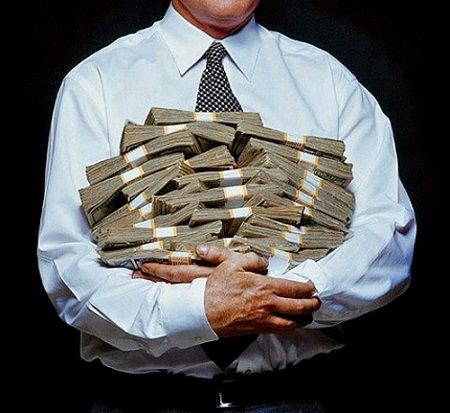

In [101]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from IPython.display import display, Image

# Define the input data
input_data = (
    input('What is the Title of Project: '),
    input('What is the Category Name of Project: '),
    float(input('What is the Experience required for the Project(Entry=1,Intermediat=2,Expert=3: ')),
    input('What is the Sub-Category Name of Project: '),
    float(input('What is the Currency Transaction for project(Give it as 1): ')),
    input('From where the Freelancer Preferred From(give any place/Location): '),
    input('Give the description of project: '),
    input('Which is the Client City: '),
    input('Which is the Client Country: '),
    float(input('Which is the Client Currency(give it in US  insert it as 1): ')),
    float(input('Is the Location_onsite (Yes=1, No=0): ')),
    float(input('Is the Location_remote (Yes=1, No=0): ')),
    float(input('Is the Location_remote_Country (Yes=1, No=0): ')),
    float(input('Is the Type of Project Budget is Fixed_price(Yes=1, No=0): ')),
    float(input('Is the Type of Project Budget is Hourly Price(Yes=1, No=0): ')),   
    float(input('posted_year: ')),
    float(input('Posted_Month: ')),
    float(input('Posted_Date: ')),
    float(input('Client Registration year: ')),
    float(input('Client Registration Month: ')),
    float(input('Client Registration date: ')),
    float(input('Posted Hour: ')),
    float(input('Posted Min: ')),
    float(input('Posted Sec: '))

)

# Perform label encoding on string data
label_encoder = LabelEncoder()
input_data_encoded = list(input_data)
input_data_encoded[0] = label_encoder.fit_transform([input_data[0]])[0]
input_data_encoded[1] = label_encoder.fit_transform([input_data[1]])[0]
input_data_encoded[3] = label_encoder.fit_transform([input_data[3]])[0]
input_data_encoded[5] = label_encoder.fit_transform([input_data[5]])[0]
input_data_encoded[6] = label_encoder.fit_transform([input_data[6]])[0]
input_data_encoded[7] = label_encoder.fit_transform([input_data[7]])[0]
input_data_encoded[8] = label_encoder.fit_transform([input_data[8]])[0]

# Print the encoded input data
print(input_data_encoded)

# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data_encoded)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Perform the prediction using the support_vector_model
prediction = xgb_model.predict(input_data_reshaped)
print("Budget of Given Project is:", prediction)
display(Image(filename='budget.jpg'))
